# 13주차 실습문제 - 로지스틱 회귀모델 (Ch.6.3)

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리 (경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision %.3f
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

data = pd.read_csv("health2018.csv")
data20 = data[data.age <= 20]  # 만 19~24세 남녀 데이터

In [2]:
data20.head(5)

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
163,A906023903,F,20,166.2,57.5,70.0,20.816409,91
182,A906029304,M,20,167.2,58.4,75.3,20.890090,95
197,A907023103,F,20,164.0,57.4,73.2,21.341463,84
256,A908029803,F,20,157.2,52.7,68.3,21.325810,89
257,A908029804,M,19,175.0,76.1,84.2,24.848980,89


## 1. 신체 정보로 남/여 성별 예측하기
### 1-1. data20에 male 열을 추가하고 남성은 1, 여성은 0의 값을 저장하고, 이를 확인하라.
data20.head()로 결과 출력.

In [3]:
def male(data) :
    if data == 'M' :
        return 1
    else :
        return 0
data20['male'] = data20['sex'].apply(male)
data20.head()

/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_10911/1718612933.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data20['male'] = data20['sex'].apply(male)


,ID,sex,age,height,weight,waist,BMI,Blood_glucose,male
163,A906023903,F,20,166.2,57.5,70.0,20.816409,91,0
182,A906029304,M,20,167.2,58.4,75.3,20.890090,95,1
197,A907023103,F,20,164.0,57.4,73.2,21.341463,84,0
256,A908029803,F,20,157.2,52.7,68.3,21.325810,89,0
257,A908029804,M,19,175.0,76.1,84.2,24.848980,89,1


### 1.2. height, weight, BMI 값 각각으로 남성인지 여부(male)를 예측하는 로지스틱 회귀곡선 그래프를 그려보라. 
어느 변수가 남성과 여성을 구분(분류)하는데 가장 유용한가? 남성과 여성 차이를 구분하기 가장 힘든 변수는 무엇인가?

/Users/idowon/.pyenv/versions/3.11.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/idowon/.pyenv/versions/3.11.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/idowon/.pyenv/versions/3.11.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


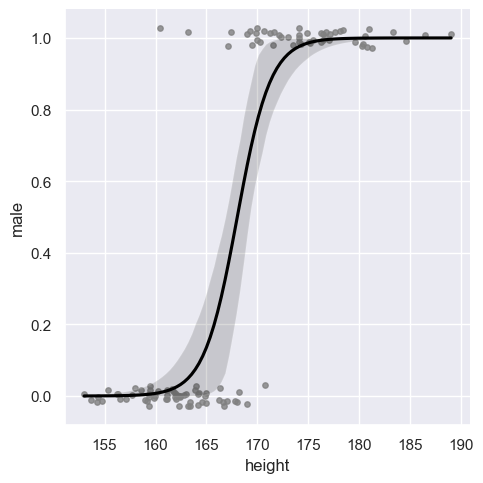

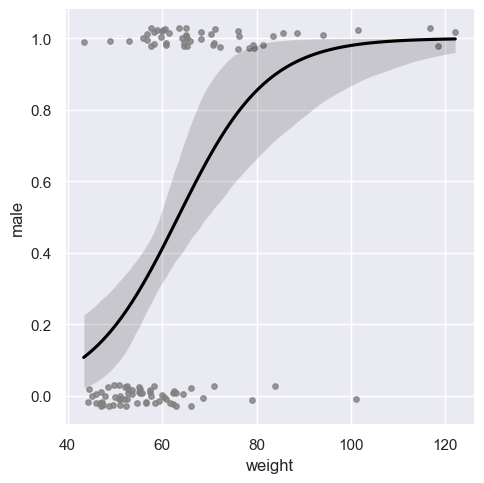

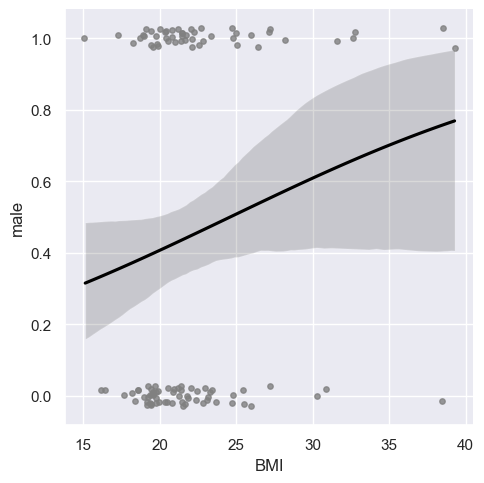

In [4]:
for x in ['height', 'weight', 'BMI'] :
    sns.lmplot(x = x, y = "male",
           data = data20, 
           logistic = True,
           scatter_kws = {"color": "gray", "s": 15},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.03)
    plt.show()

> 'height' 변수가 성별을 구분하기에 가장 유용하고
> 'BMI' 변수가 성별을 구분하기에 가장 힘들다.

### 1-3. height 값을 이용해 남성 여부(male)를 예측하는 로지스틱 회귀 모델을 만들고, null model과 비교하라. [2점]
height 변수는 통계적으로 유의미한 계수 값을 갖는가? [1점]

In [5]:
# 모델링
mod_glm1 = smf.glm(formula = "male ~ height", 
                  data = data20, 
                  family=sm.families.Binomial()).fit()
mod_glm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   male   No. Observations:                  111
Model:                            GLM   Df Residuals:                      109
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21.090
Date:                Mon, 02 Jun 2025   Deviance:                       42.181
Time:                        16:37:39   Pearson chi2:                     146.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.6308
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -102.8850     21.504     -4.784      0.000    -145.032     -60.738
height         0.6123      0.128      4.776      0.000       0.361       0.864
==============================================================================
"""

In [6]:
# Null 모델
mod_glm_null = smf.glm(
    "male ~ 1", data = data20, 
    family=sm.families.Binomial()).fit()
mod_glm_null.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   male   No. Observations:                  111
Model:                            GLM   Df Residuals:                      110
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -76.393
Date:                Mon, 02 Jun 2025   Deviance:                       152.79
Time:                        16:37:39   Pearson chi2:                     111.
No. Iterations:                     4   Pseudo R-squ. (CS):          5.551e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1989      0.191     -1.042      0.297      -0.573       0.175
==============================================================================
"""

- height 값은 통계적으로 유의미한 값을 가진다.

### 1-4. 키가 160, 165, 170, 175 cm인 사람이 있을 때, 위 height 값을 이용한 모델은 각 사람이 남자일 확률을 얼마로 예측하는가? [1점] 

In [7]:
heightEx = {
    'height' : np.arange(160, 176, 5)
}

pred = mod_glm1.predict(heightEx)
pred

0    0.007298
1    0.135740
2    0.770388
3    0.986240
dtype: float64

### 1-5. height, weight, BMI 값을 이용한 예측 모델을 각각 만들고(각각 하나의 독립변수로 예측), 더 성능이 좋은 순으로 나열해보라. [1점]
모델별로 AIC값을 구해서 순위를 결정할 것.

In [8]:
# 모델링
mod_glm1 = smf.glm(formula = "male ~ height", 
                  data = data20, 
                  family=sm.families.Binomial()).fit()

# 모델링
mod_glm2 = smf.glm(formula = "male ~ weight", 
                  data = data20, 
                  family=sm.families.Binomial()).fit()

# 모델링
mod_glm3 = smf.glm(formula = "male ~ BMI", 
                  data = data20, 
                  family=sm.families.Binomial()).fit()
print(f'모델(height) : {mod_glm1.aic.round(2)}')
print(f'모델(weight) : {mod_glm2.aic.round(2)}')
print(f'모델(BMI) : {mod_glm3.aic.round(2)}')

모델(height) : 46.18
모델(weight) : 125.33
모델(BMI) : 153.65


1. height
2. weight
3. BMI

### 1-6. height값에 기반한 모델로 data20의 각 샘플(행)에 대해 남성인지 확률을 추정하시오. 확률 p >= 0.5 이상이면 남성, p < 0.5 면 여성으로 분류해서 predicted_sex 열에 저장하시오. [1점] 또한 예측이 틀린 샘플을 찾아 출력하시오 (예측에 실패한 경우는 전체에서 총 몇 명인가?) [1점]

In [9]:
def maleOrFemale(data) :
    if data >= 0.5 :
        return 'M'
    else :
        return 'F'
data20['predicted_sex']= mod_glm1.predict(data20['height']).apply(maleOrFemale)
data_result = data20['sex'] != data20['predicted_sex']
len(data_result)

/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_10911/2164753314.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data20['predicted_sex']= mod_glm1.predict(data20['height']).apply(maleOrFemale)


111

---

## 2. 로지스틱 회귀모델에 기반한 당뇨병 환자 분류 예측
만 41~60세의 데이터 data2 변수에 diabete 열을 추가하고, Blood_glucose > 125인 경우를 1로, 그외의 경우 0을 저장하시오.

### 2-1. 단일 요인(독립변수)를 이용해 당뇨병(diabete)를 예측하는 로지스틱 회귀 곡선을 만들어라. 당뇨병과 가장 관계가 높아보이는 요인은 무엇인가?
age, height, weight, waist, BMI를 각각 독립변수(원인변수)로 썼을 때의 그래프를 비교해보시오.

In [10]:
data2 = data[(data.age > 40) & (data.age <= 60)]  # 만 41~60세 남녀 데이터

In [52]:
def diabete(data) :
    if data > 125 :
        return 1
    else :
        return 0
data2['diabete'] = data['Blood_glucose'].apply(diabete)

/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_8665/63783023.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['diabete'] = data['Blood_glucose'].apply(diabete)


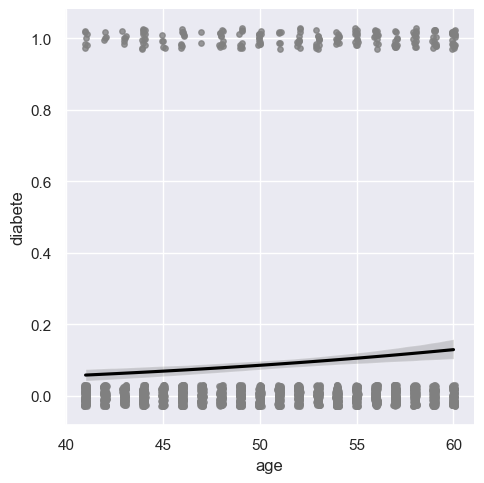

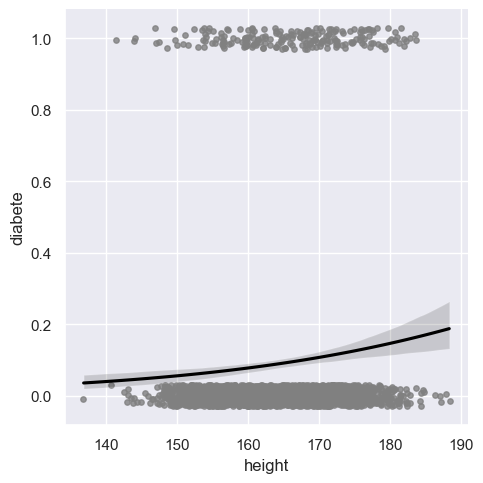

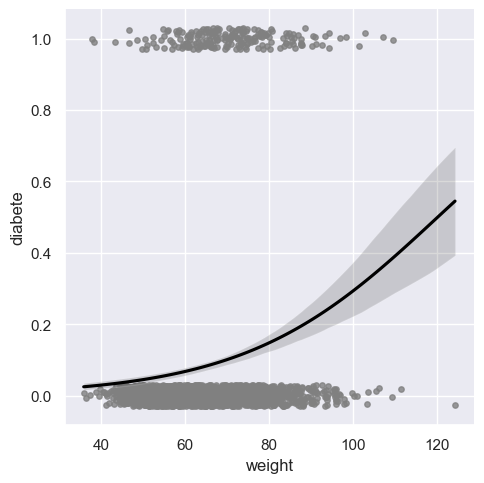

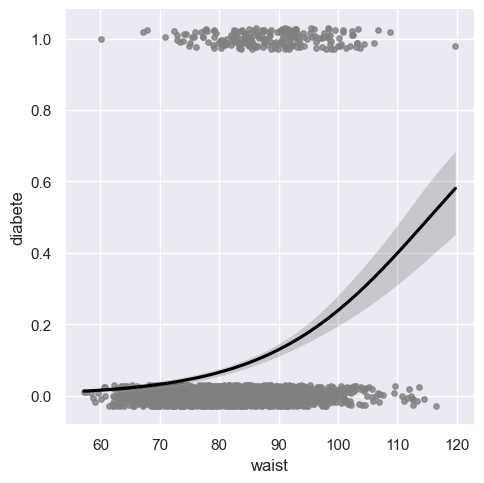

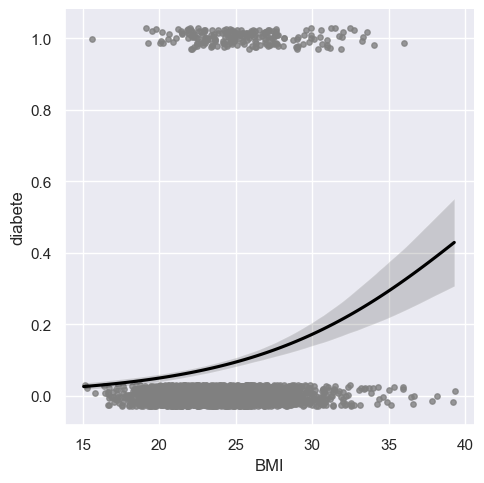

In [53]:
for x in ['age', 'height', 'weight', 'waist', 'BMI'] :
    sns.lmplot(x = x, y = "diabete",
           data = data2, 
           logistic = True,
           scatter_kws = {"color": "gray", "s": 15},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.03)
    plt.show()

> 'waist' 변수가 당뇨병과 가장 연관이 있다.

### 2-2. 단일 요인(독립변수)를 이용해 당뇨병 여부(diabete)를 가장 잘 예측하는 로지스틱 회귀 모델을 만들어라. 
AIC 기준으로 어느 모델이 가장 적합한가? (단, Blood_glucose는 사용할 수 없다.)

In [61]:
mod_glmm = {}
for x in ['age', 'height', 'weight', 'waist', 'BMI'] :
    mod_glmm[x] = smf.glm(formula = f"diabete ~ {x}", 
                  data = data2, 
                  family=sm.families.Binomial()).fit()
    print(f'{x}와의 로지스틱 회귀 모델의 aic값 : {mod_glmm[x].aic.round(2)}')

age와의 로지스틱 회귀 모델의 aic값 : 1374.53
height와의 로지스틱 회귀 모델의 aic값 : 1370.88
weight와의 로지스틱 회귀 모델의 aic값 : 1332.02
waist와의 로지스틱 회귀 모델의 aic값 : 1289.66
BMI와의 로지스틱 회귀 모델의 aic값 : 1342.63


- aic 값에 따라 'waist' 변수와의 로지스틱 회귀 모델이 가장 적합하다.